   *«У нас нет времени для игр, мы должны воевать!»*

   -- Орда, Шаман

#  Исследование закономерностей определяющие успешность игры в 2017 году

В данной работе по данным до 2016 интернет-магазина "Стримчик" будет произведена оценка параметров, определяющих успешность игр, которая позволит определить потенциально популярные продукты в 2017 году и спланировать рекламные кампании. Для анализа мы будем использовать данные количестве проданных копий разных игр от 1980 до 2016 года в разных регионах и на разных платформах. В ходе исследования мы определим популярнейшие игровые платформы и влияние отзывов критиков и пользователей на количество проданых копий.

**Цель исследования:** Провести анализ данных, который поможет разработать стратегию поведения рекламной кампании интернет-магазина "Стримчик" на 2017 год.

**Задачи исследования:** Определить параметры, свойственные наиболее популярным игровым продуктам и их поведение в разных регионах.

<a name="s1"></a>
## Данные

Извлечём данные и посмотрим на них.

In [1]:
import math
import pandas as pd
import numpy as np
import statistics
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import pearsonr
from scipy import stats as st

Посмотрим на загружаемые данные.

In [2]:
data = pd.read_csv('/datasets/games.csv')

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Приведём названия столбцов данных к нижнему регистру.

In [3]:
i = 0; a = []
while i < len(data.columns):
    a.append(data.columns[i].lower())
    i = i + 1

data.columns = a
del a

И посмотрим общую информацию о данных.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


У нас есть данные по играм за 36 лет.

In [5]:
print(min(data['year_of_release']), '-', max(data['year_of_release']))

1980.0 - 2016.0


Количество платформ в указанных данных поражает воображение.

In [6]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Количество уникальных имён игр значительно меньше общего количичества релизов. Это не ошибка, ниже будет указано, почему так произошло.

In [7]:
len(data['name'].unique())

11560

Всего 12 жанров, каждой игре соответсвует только один.

In [8]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Далеко не у каждой игры из набора данных есть возрастной рейтинг. Лично мне знакома только одна категория возрастного рейтинга и это 'nsfw'. Так что неплохо было бы знать, что значат буквы ниже.

In [9]:
data['rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

<a name="s2"></a>
## Предобработка

<a name="s21"></a>
### Название

Существуют две игры с неизвестным именем, кроме того это единственные строки с пропущенным жанром. Будем считать, что такого быть не может и существование этих строк есть результат некой технической ошибки.

In [10]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Поскольку таких строк всего две, то удалим обе.

In [11]:
data = data.drop([659, 14244])

Кроме того существуют сроки с повторяющимеся именами.

In [12]:
data['name'].value_counts().head(10)

Need for Speed: Most Wanted     12
LEGO Marvel Super Heroes         9
Madden NFL 07                    9
FIFA 14                          9
Ratatouille                      9
Cars                             8
LEGO The Hobbit                  8
Lego Batman 3: Beyond Gotham     8
Angry Birds Star Wars            8
FIFA Soccer 13                   8
Name: name, dtype: int64

<a name="m2"></a>

Может показаться, что это дубликаты, однако при детальном рассмотрении оказывается, что это переиздания одних и тех же игр на разных платформах и/или в разные годы, поэтому с такими "дубликатами" не требуется производить дополнительных действий на данном этапе.

In [13]:
data.loc[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Стоит однако отметить некую странность: у одной и той же игры в разные года и на разных платформах разные возрастные рейтинги. Возможно, это результат некоторых изменений в играх для разных годов и для разных платформ, но также возможно, что в разные года менялась политика выставления оценок.

<a name="s22"></a>
### Год

Было бы логично преобразовать года к `datetime`, но в данном анализе с годами крайне удобно работать в `int`. Отметим пропущенные года значением `-1`.

In [14]:
data.loc[data['year_of_release'].isna(), 'year_of_release'] = -1

In [15]:
#data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data = data.astype({'year_of_release': 'int'})

Некоторые года выхода в таблице пропущены, однако ряд таких пропусков можно восстановить по названию игры, если в ней указан год выпуска. Возможно, это не совсем корректно, поскольку в названии игры не обязательно указан год релиза, но лучшего решения тут нет.

In [16]:
a = data.loc[data['year_of_release'] < 0, 'name'].index; j = 0
for i in data.loc[data['year_of_release'] < 0, 'name']:
    y = re.search('\d{4}', i)
    if y != None and int(y[0]) >= 1980 and int(y[0]) <= 2016: # добавим проверку на год, чтобы исключить в наборе данных заведомо неверные года
        data.loc[a[j], 'year_of_release'] = int(y[0])
    j = j + 1

del a

In [17]:
data.loc[data['year_of_release'] < 0, 'year_of_release'].count()

252

Всё ещё имем большое количество пропусков, однако у нас нет информации о том, чем их можно было бы заполнить, поэтому оставим эти строки как есть, информация в них может быть полезна для анализа. Можно предположить, что результатом этих пропусков является некая техническая ошибка.

<a name="s23"></a>
### Оценки

Существует большое количество пропусков в оценках критков, пользователей и в возрастном рейтинге.

In [18]:
data['critic_score'].isna().sum()

8576

In [19]:
data['user_score'].isna().sum()

6699

In [20]:
data['rating'].isna().sum()

6764

<a name="m1"></a>

Будем предполагать причиной этих пропусков тот факт, что не все игры были оценены пользователями, критиками или организацией, которая выдаёт возрастные рейтинги играм.

Заметим также, что некоторые оценки от пользователей подлежат уточнению (`tbd` -> To Be Determined), что для нас равносильно незнанию оценки.

In [21]:
data['user_score'].value_counts().index

Index(['tbd', '7.8', '8', '8.2', '8.3', '8.5', '7.5', '7.9', '8.1', '7.7',
       '7.3', '8.4', '7.6', '7', '7.4', '8.6', '6.8', '8.7', '8.8', '7.1',
       '7.2', '8.9', '6.6', '6.9', '6.3', '6.7', '6', '6.5', '9', '6.2', '6.4',
       '5.8', '9.1', '6.1', '5.7', '5.9', '5.6', '5.4', '5.5', '5.3', '5',
       '5.2', '4.8', '5.1', '9.2', '4.9', '4.6', '4.3', '4.5', '4.1', '4.4',
       '9.3', '4.2', '3.8', '4', '3.5', '2.8', '4.7', '3.1', '3.4', '3', '3.6',
       '3.7', '3.3', '3.2', '3.9', '2.5', '2.4', '9.4', '2', '2.1', '1.7',
       '2.9', '2.7', '1.8', '9.5', '2.2', '1.4', '2.6', '1.2', '1.6', '2.3',
       '0.3', '1.9', '1.3', '0.7', '0.5', '0.6', '0.2', '1', '1.5', '9.6',
       '0.9', '1.1', '9.7', '0'],
      dtype='object')

Удалим "уточнения" из наших данных и преобразуем столбец к более удобному типу данных.

In [22]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = math.nan
data = data.astype({'user_score': 'float'})

Существует соблазн заполнить хотябы некоторые из этих пропусков средними или медианными значениями повторяющихся игр, однако это может помешать корректной их оценке по определённым типам платформ, поэтому вместо того мы создадим отдельную `data2` в которой будем хранить значения среднего рейтинга критиков, среднего рейтинга пользователей, количество сборов по каждому из регионов, наиболее часто встречающегося жанра и наиболее часто встречающегося возрастного рейтинга для каждого уникального названия игры там где это возможно, а пропуски оценок в `data` оставим незаполненными.

In [23]:
len(data['name'].unique())

11559

Для того чтобы отслежить современные тенденции возьмём данные за последние 5 лет.

In [24]:
nu = data['rating'].value_counts().index
def aa(a): # распределяет рейтинги
    if a.duplicated().sum() != 0:
        if (a.mode().empty): # вот именно из-за таких ситуаций я ненавижу этот Богом проклятый подход к использованию большого количиства готовых ускоспециализированных функций
            return None
        if (a.mode()[0] == 'nan'): # ну вот по какой сюрреалистичной причине mode() при встрече с NaN возвращает то пустую строку, то считает его за реальное значение?
            return None
        return a.mode()
    else:
        global nu
        a = a.tolist()
        for i in nu: # если у нас нет частовстеречающегося рейтига игры, то берём тот который чаще всего встречается у других игр из существующих рейтингов для данной игры
            if i in a:
                return i
    return None

#для жанров тут будем использовать обчную моду а не функцию, подобную функцие выше, поскольку распределение жанров в представленных данных имеет боле `нормальный` вид и, соответсвенно, вероятность того, что случайно выбранная игра будет иметь наиболее встречающийся жанр меньше, чем вероятность того, что случайно выбранная игра будет иметь наиболее часто встречающийся возрастной рейтинг, кроме того будем полагать, что жанры распределены случайно, относительно индекс и если у какой-то игры будет две моды по жанрам не будет сильного перекоса в какой-либо из жанров
data2 = pd.pivot_table(data[data['year_of_release'] >= 2012], values=['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'], index=['name'], aggfunc={'genre' : statistics.mode, 'na_sales' : np.sum, 'eu_sales' : np.sum, 'jp_sales' : np.sum, 'other_sales' : np.sum, 'critic_score': np.mean, 'user_score': np.mean, 'rating' : aa})
data2.head(10)

,critic_score,eu_sales,genre,jp_sales,na_sales,other_sales,rating,user_score
name,,,,,,,,
Beyblade Burst,NaN,0.00,Role-Playing,0.03,0.00,0.00,None,NaN
Fire Emblem Fates,NaN,0.23,Role-Playing,0.52,0.81,0.11,None,NaN
Frozen: Olaf's Quest,NaN,0.53,Platform,0.00,0.48,0.09,None,NaN
Haikyu!! Cross Team Match!,NaN,0.00,Adventure,0.04,0.00,0.00,None,NaN
Tales of Xillia 2,71.0,0.12,Role-Playing,0.45,0.20,0.07,T,7.9
.hack: Sekai no Mukou ni + Versus,NaN,0.00,Action,0.03,0.00,0.00,None,NaN
1/2 Summer +,NaN,0.00,Adventure,0.01,0.00,0.00,None,NaN
12-Sai. Honto no Kimochi,NaN,0.00,Adventure,0.07,0.00,0.00,None,NaN
12-Sai. Koisuru Diary,NaN,0.00,Adventure,0.05,0.00,0.00,None,NaN


Да, у нас всё ещё остались пропуски в оценках и возрастных рейтингах, но у нас слишком мало данных, чтобы было ясно чем их можно заполнить (медианное значение по жанрам для этих целей плохо подходит, поскольку оставит явные пики на соответсвующих распределениях, чего хотелось бы избежать), но и исключить соответсвующие строки из рассмотрения будет ошибкой, поскольку эти данные составляют значимую часть от всего массива информации.

<a name="s23.5"></a>
### Поиск дубликатов

Как уже было сказано, в представленных данных существуют дубликаты.

In [25]:
data[data[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,-1,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Самая первая игра из этого списка, как уже было сказано, представляет из себя переиздание за другой год. Обратим наше внимание на вторую строку в которой дубликат представляет из себя данные за неизвестный год. Данну строку мы также оставим.

In [26]:
data[data['name'] == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,-1,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


Последняя строка представляет из себя дубликат другой строки.

In [27]:
data[data['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Можно добавить её копии к уже существующей и удалить её.

In [28]:
data.loc[604, 'eu_sales'] = data.loc[604, 'eu_sales'] + data.loc[16230, 'eu_sales']
data = data.drop(16230)

<a name="s24"></a>
### Сумма продаж

Для дальнейшего анализа будет полезно добавить дополнительные столбцы с суммой количества проданных копий продаж по всем регионам для `data` и `data2`.

In [29]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data2['sales'] = data2['na_sales'] + data2['eu_sales'] + data2['jp_sales'] + data2['other_sales']

<a name="s25"></a>
### Итог

Данные приведены к удобному для анализа формату, некоторые пробелы в данных были заполнены, для других же подходящих данных не оказалось. Была создана дополнительная таблица в которой собрана информация об играх по уникальному имени. Кроме того был создан новый столбец с суммой средсв продаж по всем регионам.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
 11  sales            16712 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1671 entries,  Beyblade Burst to inFAMOUS: Second Son
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   critic_score  736 non-null    float64
 1   eu_sales      1671 non-null   float64
 2   genre         1671 non-null   object 
 3   jp_sales      1671 non-null   float64
 4   na_sales      1671 non-null   float64
 5   other_sales   1671 non-null   float64
 6   rating        772 non-null    object 
 7   user_score    764 non-null    float64
 8   sales         1671 non-null   float64
dtypes: float64(7), object(2)
memory usage: 130.5+ KB


## Непосредственно анализ

Видно, что за последние пять лет количество релизов игр сократилось по сравнению с предыдущем периодом. Цветами на графике показана доля проданых копий за указанный год.

Text(0.5, 0, 'год')

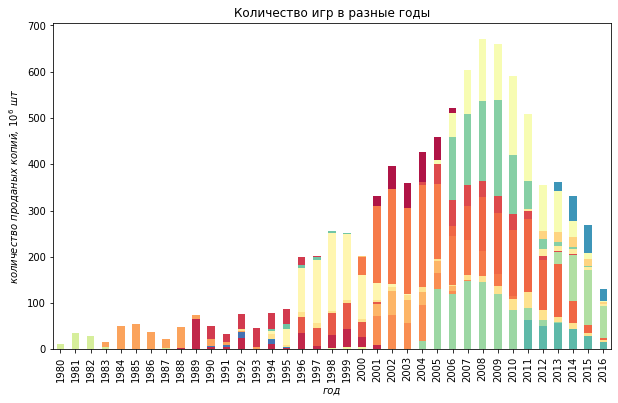

In [32]:
palet = sns.color_palette("Spectral", 31)
random.shuffle(palet)

(
    pd.pivot_table(data[data['year_of_release'] > 0], index=['year_of_release'], values='sales', columns=['platform'], aggfunc='sum')
    .plot(kind='bar', stacked=True, figsize=(10,6), align='center', legend=False, color=palet)
)
plt.title('Количество игр в разные годы')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('год', style='italic')

Хоть тенденции заложенные 20+ лет назад безусловно находят отражение в 2017 году, в том смысле в котором вчерашний день является отражением сегодняшнего, сегодняшний является отражением завтрашнего, а завтрашний является отражением послезавтрашнего, стоит признать, что ближайшие по времени года яснее показывают текущее положение вещей. Например, на графике видно, что за последние 6 лет на некоторой платформе (обозначенной нижней с 2004 по 2010 года) продаётся намного меньше копий, чем за предудущие 6 лет, а к 2014 году оно и вовсе стало равно нулю. В данном анализе мы будем в основном рассматривать влияние последних пяти лет (с 2012 года включительно), чтобы строить прогнозы на будущие года. Такой промежуток обусловлен тем, что общее количество проданых копий за эти года примерно равно друг другу (исключая 2016 год, по которому имеется некоторый недостаток данных).

Можно дополнительно убедиться в справедливости тезиса указанного выше сравнив 8 лидерующих платформ по количествам продаж за всё время

In [33]:
pd.pivot_table(data, index=['platform'], values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).head(8)

,sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14


и за последние пять лет.

In [34]:
pd.pivot_table(data[data['year_of_release'] >= 2012], index=['platform'], values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).head(8)

,sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,63.00
PSV,49.18


Можно заметить, что список существенно изменился, многие платформы вовсе пропали из него.

---

Как уже было замечено выше, для анализа мы будем в основном использовать данные последних пяти лет, но так как в анализе нам важны наиболее атуальные тенденции, а данные за 2016 отличаются некоторой неполнотой, то рассматривать мы будем наипопулярнейшие платформы за последние два года. Выберем 5 наипопулярнейших за это время платформ, которые ответсвенны за продажу более 90% копий за указаный период.

In [35]:
pd.pivot_table(data[data['year_of_release'] >= 2015], index=['platform'], values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).head(5).sum() / pd.pivot_table(data[data['year_of_release'] >= 2015], index=['platform'], values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).sum()

sales    0.901513
dtype: float64

Из рисунка ниже видно, что наиболее большой рост продаж показывает `PS4` на второе место по данному показателю можно поставить `XOne`, остальные платформы либо снижаю количетсво продаж либо стагнируют.

Text(0.5, 0, 'год')

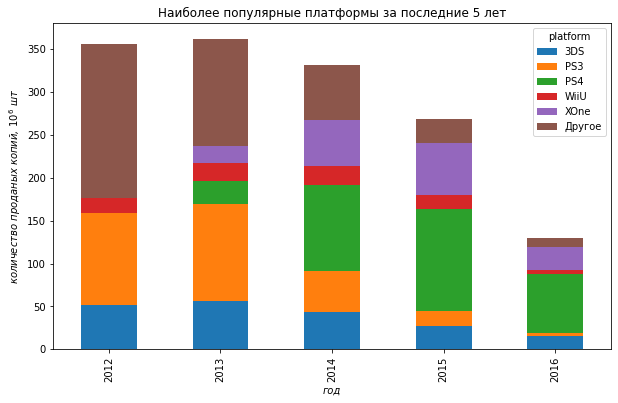

In [36]:
pltfrm = pd.pivot_table(data[data['year_of_release'] >= 2015], index=['platform'], values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).head(5).index # самые популярные платформы
tmp = data.copy(deep=True) # нужна, чтобы показать влияниние непопулярных в рассматриваемый период платформ
tmp.loc[~tmp['platform'].isin(pltfrm), 'platform'] = 'Другое'

#palet = sns.color_palette("Spectral", 6)

(
    pd.pivot_table(tmp[(tmp['year_of_release'] >= 2012)], index=['year_of_release'], values='sales', columns=['platform'], aggfunc='sum')
    .plot(kind='bar', stacked=True, figsize=(10,6), align='center')#, color=palet)
)
plt.title('Наиболее популярные платформы за последние 5 лет')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('год', style='italic')

---

Построим диаграмму размаха для отобраных самых популярных платформ. На рисунке видно, что за последние 2 года `PS4` имеет наибольшее количество продаж, чем другие популярные платформы на второе место по данному показателю можно поставить `XOne`.

Text(0.5, 0, 'платформа')

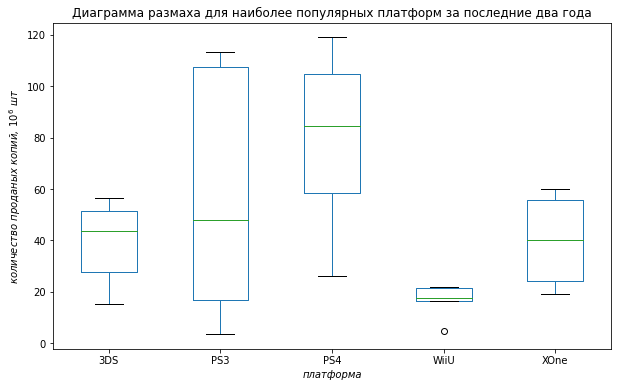

In [37]:
(
    pd.pivot_table(data[data['platform'].isin(pltfrm) & (data['year_of_release'] >= 2012)], index=['year_of_release'], values='sales', columns=['platform'], aggfunc='sum')
    .boxplot(figsize=(10,6), grid=False)
)
plt.title('Диаграмма размаха для наиболее популярных платформ за последние два года')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('платформа', style='italic')

---

Посмотрим, как влияют на продажи внутри популярных платформ отзывы пользователей и критиков. Для расчёта возьмём данные за пять лет. Из информации ниже видно, что наиболее значимы отзывы пользователей для платформы `WiiU` и `3DS`, на остальных же платформах количество проданых копий не зависит от отзывов пользователе. Оценка критиков имеет линейную связь для количества проданых копий для всех платформ, но наибольшее влияние можно наблюдать на `PS4` и `XOne`.

In [38]:
print('Коэфициент Пирсона')
for i in pltfrm:
    tmp = data[(data['platform'] == i) & (data['year_of_release'] >= 2012)]
    print('Для платформы', i)
    no = np.logical_or(tmp['user_score'].isna(), tmp['sales'].isna())
    p = pearsonr(tmp.loc[~no, 'user_score'], tmp.loc[~no, 'sales'])
    if p[1] < 0.05:
        print('Для пользователей:', p[0], '| значимый')
    else:
        print('Для пользователей:', p[0], '| незначимый')
    no = np.logical_or(tmp['critic_score'].isna(), tmp['sales'].isna())
    p = pearsonr(tmp.loc[~no, 'critic_score'], tmp.loc[~no, 'sales'])
    if p[1] < 0.05:
        print('Для критиков:', p[0], '| значимый')
    else:
        print('Для критиков:', p[0], '| незначимый')

Коэфициент Пирсона
Для платформы PS4
Для пользователей: -0.03195711020455645 | незначимый
Для критиков: 0.40656790206178134 | значимый
Для платформы XOne
Для пользователей: -0.06892505328279416 | незначимый
Для критиков: 0.41699832800840153 | значимый
Для платформы 3DS
Для пользователей: 0.197582634110386 | значимый
Для критиков: 0.3208028695360786 | значимый
Для платформы WiiU
Для пользователей: 0.40021902021486166 | значимый
Для критиков: 0.34837976012017485 | значимый
Для платформы PS3
Для пользователей: -0.00621785196055928 | незначимый
Для критиков: 0.3341655878702379 | значимый


---

Попробуем узнать, как зависит количество проданых игр от оценок пользователей и критиков. Для анализа возьмём данные по всем играм за последние 5 лет.

Text(0.5, 0, 'оценка по 100-бальной шкале')

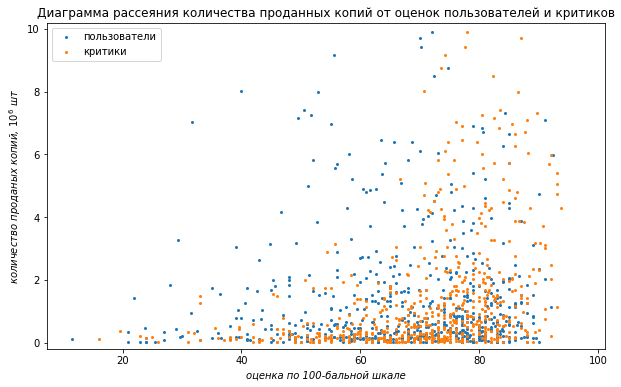

In [39]:
tmp = pd.pivot_table(data2, index=['user_score', 'critic_score'], values='sales', aggfunc='sum').reset_index()
tmp['user_score'] = 10 * tmp['user_score'] # приведём данные к общей шкале

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.scatter(x=tmp['user_score'], y=tmp['sales'], label='пользователи', s=4)
ax.scatter(x=tmp['critic_score'], y=tmp['sales'], label='критики', s=4)

plt.title('Диаграмма рассеяния количества проданных копий от оценок пользователей и критиков')
plt.legend()
plt.ylim([-0.2, 10.2])
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('оценка по 100-бальной шкале', style='italic')

Красиво, но непонятно. Найдём коэфициенты Пирсона чтобы понять, есть ли зависимость между оценками и количеством продаж.

In [40]:
pearsonr(tmp['user_score'], tmp['sales'])

PearsonRResult(statistic=-0.06082368521013816, pvalue=0.11766978203202)

In [41]:
pearsonr(tmp['critic_score'], tmp['sales'])

PearsonRResult(statistic=0.3014502509913008, pvalue=2.146196349878651e-15)

Из приведённых значений следует, что рейтинг пользователей почти не влияет на количество продаж. Однако оценка критиков имеет большее и статистически значимое влияние на продажи.

---

Распределение проданых копий по жанрам имеет вид Пуассоновского распределения. Наиболее продаваемые игры с жанром `Action`, наимение продаваемые с жанром `Puzzle`.

Text(0.5, 0, 'жанр')

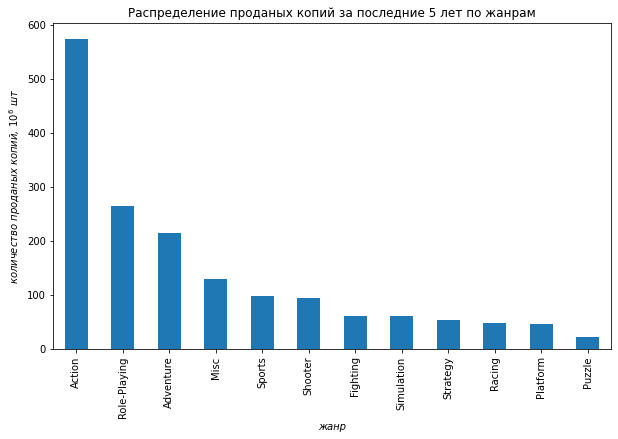

In [42]:
#palet = sns.color_palette("Spectral", 6)

(
    data2.groupby('genre')['sales'].count().sort_values(ascending=False)
    .plot(kind='bar', stacked=True, figsize=(10,6), align='center')#, color=palet)
)
plt.title('Распределение проданых копий за последние 5 лет по жанрам')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('жанр', style='italic')

Посмотрим также на распределение средних проданных копий которое позволит понять, сколько приходиться проданных копий на одну игру в жанре. Тут мы наблюдаем иную ситуацию, однако вид рапределения всё также Пуассоновский. Наибольшуюю "продаваемость" здесь демонстрирует жанр `Shooter` в то время, как `Action` располагается лишь на пятом месте.

Text(0.5, 0, 'жанр')

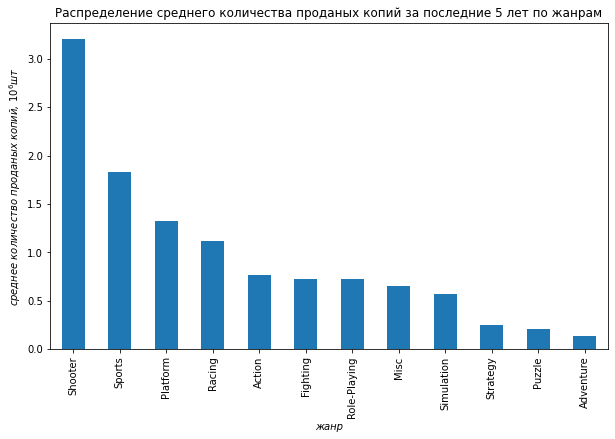

In [76]:
#palet = sns.color_palette("Spectral", 6)

(
    data2.groupby('genre')['sales'].mean().sort_values(ascending=False)
    .plot(kind='bar', stacked=True, figsize=(10,6), align='center')#, color=palet)
)
plt.title('Распределение среднего количества проданых копий за последние 5 лет по жанрам')
plt.ylabel('среднее количество проданых копий, $10^6 шт$', style='italic')
plt.xlabel('жанр', style='italic')

## Портреты регионов

Посмотрим на количество проданных копий в каждом из регионов по данным за последние 5 лет. На графиках ниже видно, что в Северной Америке наибольшей популярностьюю пользуется `X360`, тогда как в Европе и Японии это `PS4` и c большим отрывом `3DS` соответсвенно. Распределения Европы и Северной Америки имеют больше схожего между собой, чем с распределением Японии.

Text(0.5, 0, 'платформа')

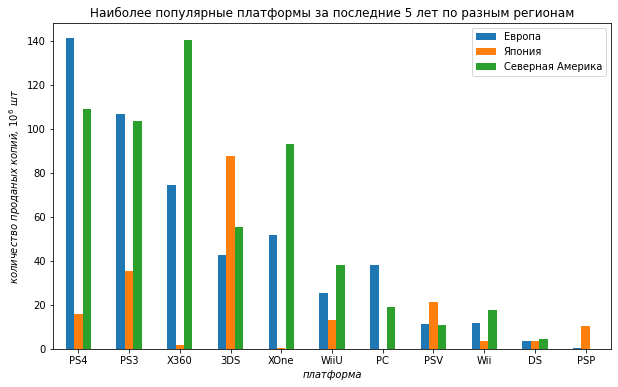

In [44]:
(
    pd.pivot_table(data[(data['year_of_release'] >= 2012)], index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales', 'sales'], aggfunc='sum').sort_values(by='sales', ascending=False).drop(columns='sales')
    .plot(kind='bar', rot=0, figsize=(10,6), align='center')#, color=palet)
)
plt.legend(['Европа', 'Япония', 'Северная Америка'])
plt.title('Наиболее популярные платформы за последние 5 лет по разным регионам')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('платформа', style='italic')

Кроме того, можно построить отдельные рисунки для каждого из регионов.

Text(0.5, 0, 'платформа')

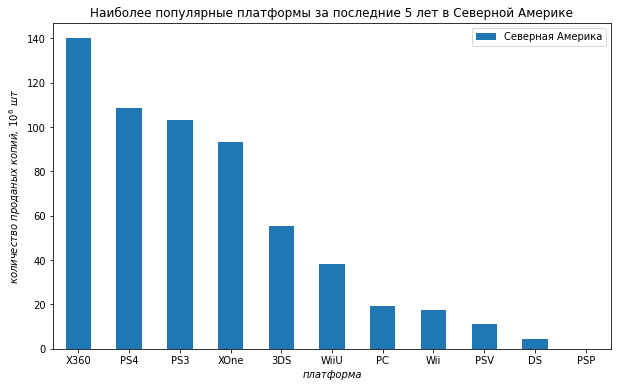

In [45]:
(
    pd.pivot_table(data[(data['year_of_release'] >= 2012)], index=['platform'], values=['na_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
    .plot(kind='bar', rot=0, figsize=(10,6), align='center')#, color=palet)
)
plt.legend(['Северная Америка'])
plt.title('Наиболее популярные платформы за последние 5 лет в Северной Америке')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('платформа', style='italic')

Text(0.5, 0, 'платформа')

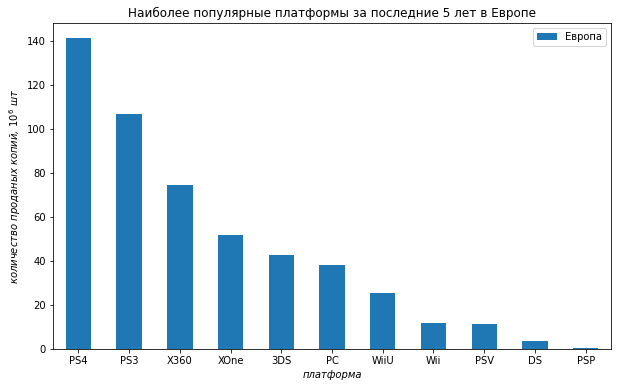

In [46]:
(
    pd.pivot_table(data[(data['year_of_release'] >= 2012)], index=['platform'], values=['eu_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False)
    .plot(kind='bar', rot=0, figsize=(10,6), align='center')#, color=palet)
)
plt.legend(['Европа'])
plt.title('Наиболее популярные платформы за последние 5 лет в Европе')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('платформа', style='italic')

Text(0.5, 0, 'платформа')

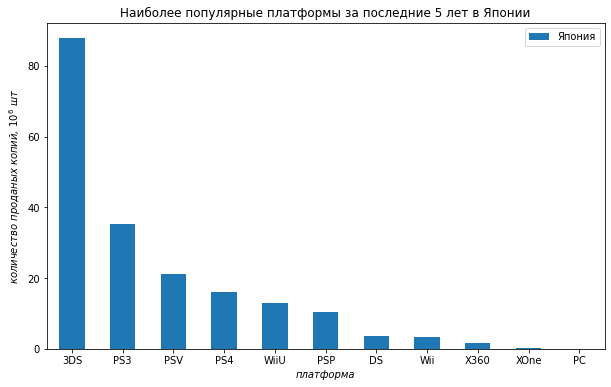

In [47]:
(
    pd.pivot_table(data[(data['year_of_release'] >= 2012)], index=['platform'], values=['jp_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False)
    .plot(kind='bar', rot=0, figsize=(10,6), align='center')#, color=palet)
)
plt.legend(['Япония'])
plt.title('Наиболее популярные платформы за последние 5 лет в Японии')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('платформа', style='italic')

---

Можно посмотреть на распределения самых популярных жанров в различных регионах по данным за последние 5 лет. На графиках ниже видно, что в Северной Америке и в Европе наибольшей популярностьюю пользуется `Action`, тогда как в Японии это `Role-Playing`, а `Action` лишь на втором месте. Распределения Европы и Северной Америки имеют больше схожего между собой, чем с распределением Японии.

Text(0.5, 0, 'жанр')

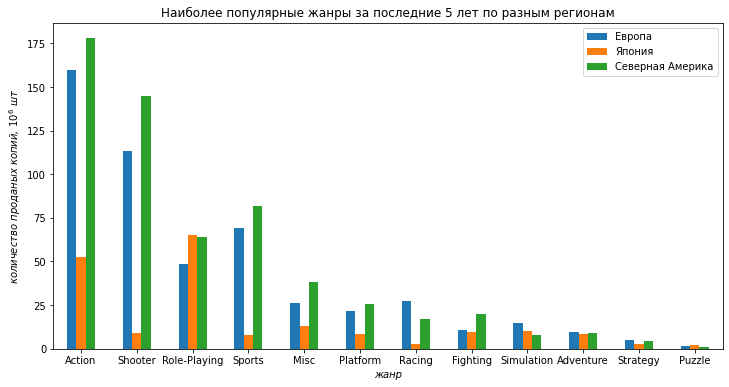

In [48]:
(
    pd.pivot_table(data2, index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales', 'sales'], aggfunc='sum').sort_values(by='sales', ascending=False).drop(columns='sales')
    .plot(kind='bar', rot=0, figsize=(12,6), align='center')#, color=palet)
)
plt.legend(['Европа', 'Япония', 'Северная Америка'])
plt.title('Наиболее популярные жанры за последние 5 лет по разным регионам')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('жанр', style='italic')

Кроме того, можно построить отдельные рисунки для каждого из регионов.

Text(0.5, 0, 'жанр')

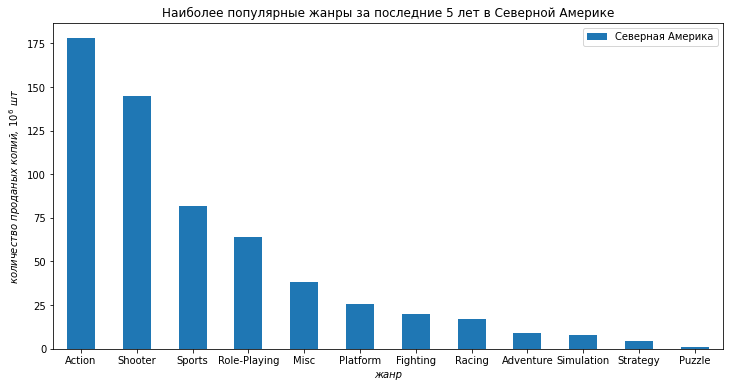

In [49]:
(
    pd.pivot_table(data2, index=['genre'], values=['na_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
    .plot(kind='bar', rot=0, figsize=(12,6), align='center')#, color=palet)
)
plt.legend(['Северная Америка'])
plt.title('Наиболее популярные жанры за последние 5 лет в Северной Америке')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('жанр', style='italic')

Text(0.5, 0, 'жанр')

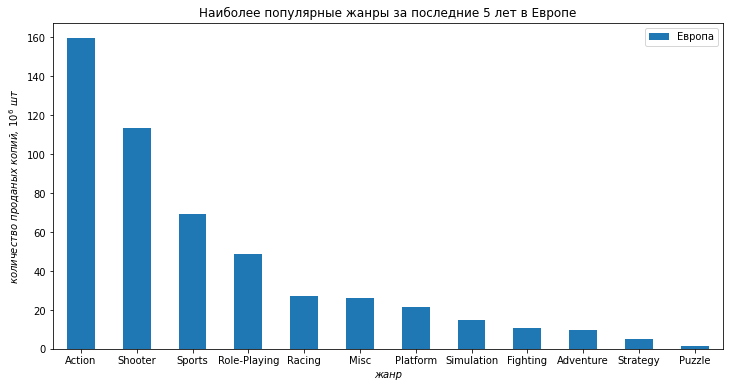

In [50]:
(
    pd.pivot_table(data2, index=['genre'], values=['eu_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False)
    .plot(kind='bar', rot=0, figsize=(12,6), align='center')#, color=palet)
)
plt.legend(['Европа'])
plt.title('Наиболее популярные жанры за последние 5 лет в Европе')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('жанр', style='italic')

Text(0.5, 0, 'жанр')

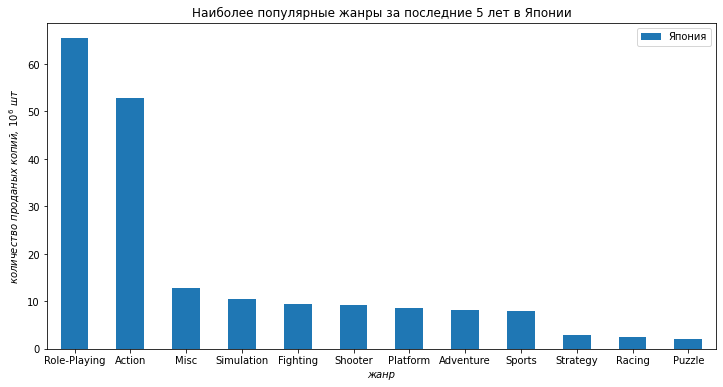

In [51]:
(
    pd.pivot_table(data2, index=['genre'], values=['jp_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False)
    .plot(kind='bar', rot=0, figsize=(12,6), align='center')#, color=palet)
)
plt.legend(['Япония'])
plt.title('Наиболее популярные жанры за последние 5 лет в Японии')
plt.ylabel('количество проданых копий, $10^6$ шт', style='italic')
plt.xlabel('жанр', style='italic')

---

Далее посмотрим распределение влияние возрастного рейтинга на количество проданых копий игр для каждого из региона, основываясь на данных за последние 5 лет. Чтобы посмотреть именно на влияние рейтинга на продажу игр мы не можем полагаться на чистое количество проданых копий, поскольку количество игр для разных возрастных рейтингов будет разным. Для того, чтобы учесть это мы введём для каждого из рейтингов вес, который будет заключаться в деление количества копий для региона на общее количество игр в данной возрастной категории.

Text(0.5, 0, 'возрастной рейтинг')

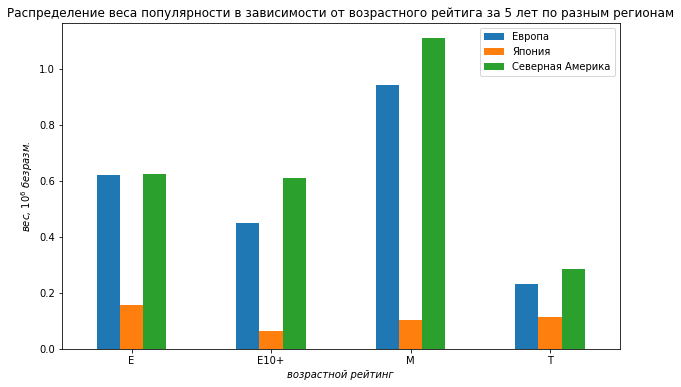

In [52]:
(
    (pd.pivot_table(data2, index=['rating'], values=['na_sales', 'eu_sales', 'jp_sales', 'sales'], aggfunc='sum').sort_values(by='sales', ascending=False).drop(columns='sales').T / data2['rating'].value_counts()).T
    .plot(kind='bar', rot=0, figsize=(10,6), align='center')#, color=palet)
)
plt.legend(['Европа', 'Япония', 'Северная Америка'])
plt.title('Распределение веса популярности в зависимости от возрастного рейтига за 5 лет по разным регионам')
plt.ylabel('вес, $10^6$ безразм.', style='italic')
plt.xlabel('возрастной рейтинг', style='italic')

Из рисунка следует, что наибольшей популярностью в Европе и Северной Америке пользуются игры с возрастным рейтингом `M`, тогда как для Японии это рейтиг `E`. Наимение популярный возрастной рейтинг также совпадает для Европы и Северной Америки (`T`), но является другим для Японии (`E10+`). Следует также отметить, что из-за особенности нашего расчёта было бы некорректно сравниванивать вес рейтинга между регионами, но можно сравнивать рейтинги в рамках одного региона.

Кроме того, можно рассмотреть соответветсвующее распределение с учётом неоценённых игр. Из которого видно, что для всех стран, кроме Японии факт отсутсвия рейтнига негативно сказывается на количестве проданых копий.

Text(0.5, 0, 'возрастной рейтинг')

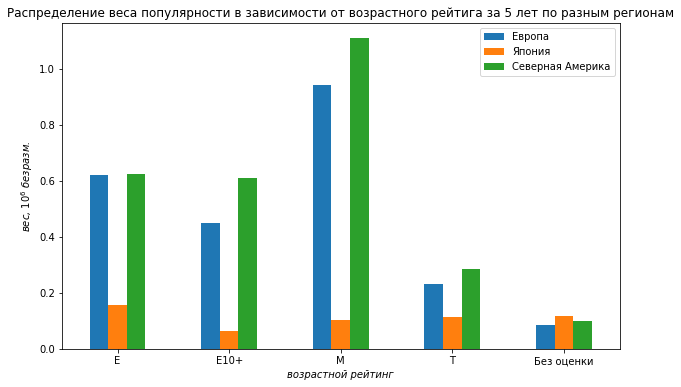

In [54]:
data2.loc[data2['rating'].isna(), 'rating'] = 'Без оценки'
(
    (pd.pivot_table(data2, index=['rating'], values=['na_sales', 'eu_sales', 'jp_sales', 'sales'], aggfunc='sum').sort_values(by='sales', ascending=False).drop(columns='sales').T / data2['rating'].value_counts()).T
    .plot(kind='bar', rot=0, figsize=(10,6), align='center')#, color=palet)
)
plt.legend(['Европа', 'Япония', 'Северная Америка'])
plt.title('Распределение веса популярности в зависимости от возрастного рейтига за 5 лет по разным регионам')
plt.ylabel('вес, $10^6$ безразм.', style='italic')
plt.xlabel('возрастной рейтинг', style='italic')

Text(0.5, 0, 'возрастной рейтинг')

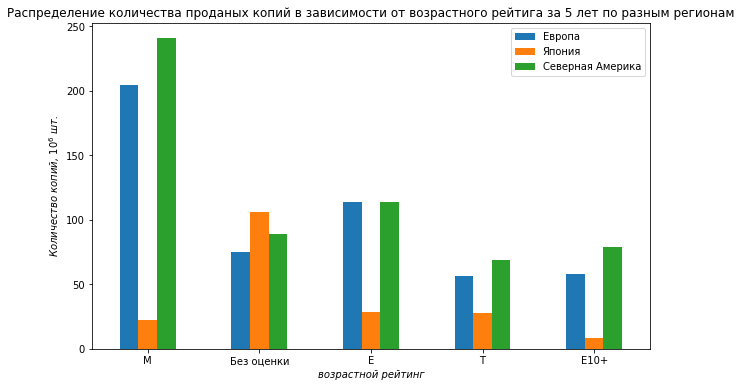

In [58]:
data2.loc[data2['rating'].isna(), 'rating'] = 'Без оценки'
(
    pd.pivot_table(data2, index=['rating'], values=['na_sales', 'eu_sales', 'jp_sales', 'sales'], aggfunc='sum').sort_values(by='sales', ascending=False).drop(columns='sales')
    .plot(kind='bar', rot=0, figsize=(10,6), align='center')#, color=palet)
)
plt.legend(['Европа', 'Япония', 'Северная Америка'])
plt.title('Распределение количества проданых копий в зависимости от возрастного рейтига за 5 лет по разным регионам')
plt.ylabel('Количество копий, $10^6$ шт.', style='italic')
plt.xlabel('возрастной рейтинг', style='italic')

In [67]:
data2.loc[data2['rating'] == 'Без оценки', 'na_sales'].sum() / data2['na_sales'].sum()

0.15082144730385938

In [68]:
data2.loc[data2['rating'] == 'Без оценки', 'eu_sales'].sum() / data2['eu_sales'].sum()

0.14775080363657878

In [69]:
data2.loc[data2['rating'] == 'Без оценки', 'jp_sales'].sum() / data2['jp_sales'].sum()

0.5511475750337522

## Гипотезы

Проверим нулевую гипотезу: cредние пользовательские рейтинги платформ `XOne` и `PC` одинаковые

Альтернативная гипотеза: cредние пользовательские рейтинги платформ `XOne` и `PC` НЕ одинаковые

Для проверки гипотезы проведём t-тест для сравнения средних.

In [ ]:
# по-другому тут тяжело сдедать из-за пропусков в значениях
tmp = data.loc[(data['year_of_release'] >= 2012) & (data['platform'] == 'XOne'), 'user_score']
tmp = tmp[~tmp.isna()]
tmp2 = data.loc[(data['year_of_release'] >= 2012) & (data['platform'] == 'PC'), 'user_score']
tmp2 = tmp2[~tmp2.isna()]

alpha = 0.05 

results = st.ttest_ind(tmp, tmp2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Средние пользовательские рейтинги платформ XOne и PC НЕ одинаковые')
else:
    print('Средние пользовательские рейтинги платформ XOne и PC одинаковые') 

---

Проверим нулевую гипотезу: cредние пользовательские рейтинги жанров `Action` и `Sports` одинаковые

Альтернативная гипотеза: cредние пользовательские рейтинги жанров `Action` и `Sports` НЕ одинаковые

Для проверки гипотезы проведём t-тест для сравнения средних.

In [ ]:
# по-другому тут тяжело сдедать из-за пропусков в значениях
tmp = data.loc[(data['year_of_release'] >= 2012) & (data['genre'] == 'Action'), 'user_score']
tmp = tmp[~tmp.isna()]
tmp2 = data.loc[(data['year_of_release'] >= 2012) & (data['genre'] == 'Sports'), 'user_score']
tmp2 = tmp2[~tmp2.isna()]

alpha = 0.05 

results = st.ttest_ind(tmp, tmp2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Средние пользовательские рейтинги жанров Action и Sports НЕ одинаковые')
else:
    print('Средние пользовательские рейтинги жанров Action и Sports одинаковые') 

## Вывод

In [70]:
data2.groupby('genre')['sales'].mean().sort_values(ascending=False)

genre
Shooter         3.207684
Sports          1.828990
Platform        1.326087
Racing          1.114583
Action          0.769146
Fighting        0.729344
Role-Playing    0.727547
Misc            0.654154
Simulation      0.575738
Strategy        0.247037
Puzzle          0.212609
Adventure       0.136791
Name: sales, dtype: float64

В данном анализе исследованы некоторые закономерности, влияющие на успешность игры в 2017 году.

Самыми продающими копиии платформами являются, в порядке уменьшения популярности: `PS4`, `PS3`, `3DS`, `XOne`, `WiiU`. На этих платформах за 5 лет было продано 314.14, 288.79, 194.61, 159.32 и 82.19 млн. копий соответсвенно. Следует отметить, что наиболее быстро набирает популярность платформа `XOne`. Кроме того, при учитывание распределения продаж копий игр по платформам следует учитывать региональные особенности, например, в Японии самой продающей платформой с большим отрывом является `3DS` (87.79 млн. копий / 5 лет), а не `PS4`.

Наиболее значимы отзывы пользователей для платформы `WiiU` и `3DS`, на остальных же платформах количество проданых копий не зависит от отзывов пользователе. Оценка критиков оказывает влияние на количество проданых копий для всех платформ, но наибольшее влияние оказывает на `PS4` и `XOne`.

Жанром с наибольшим количеством проданых копий является `Action` (574 млн. копий / 5 лет), следом за ним идут `Role-Playing` (265 млн. копий / 5 лет) и `Adventure` (215 млн. копий / 5 лет). Жанром с наименьшим количество проданых копий является `Puzzle` (23 млн. копий / 5 лет). Для исследования способностей разных жанров 'продавать' копии игр также стоит учитывать региональные особенности.

Однако иной обстоит ситуация со среднеми значениями проданных копий по жанрам. Наибольшуюю "продаваемость" здесь демонстрирует жанр `Shooter` (3.2 млн. копий / 5 лет) в то время, как `Action`, лидер предыдущего списка располагается лишь на пятом месте (0.77 млн. копий / 5 лет).

Наибольшей популярностью в Европе и Северной Америке пользуются игры с возрастным рейтингом `M`, тогда как для Японии это рейтиг `E`. Наимение популярный возрастной рейтинг также совпадает для Европы и Северной Америки (`T`), но является другим для Японии (`E10+`) и безрейтинговые игры, которые составляют наибольшую категорию продаж копий игр в Японии.

**Рекомендации:** Наибольшее количество копий продаётся в Северной Америке и Европе, а не в Японии. Кроме того первые два рынка наиболее похожи, поэтому ориентироваться следует в первую очередь на них. Также для данных регионов можно организовать общую рекламную компанию, но отдельную для Японии. Самой популярной консолью будет `PS4` (и `3DS` для Японии), однако наиболее набирающей популярность является платформа `XOne`, все эти платформы стоят внимания при проведении рекламных копманий. В случае, если есть возможность с помощью рекламы продвигать целый жанр, то стоит обратить внимание не `Action`, в отсутсвии такой возможности наиболее предпочтительно продвигать отдельные игры из жанра `Shooter`. Для Европы и Северной Америки лучше всего продвигать игры с возрастным рейтингом `M`, тогда как в Японии не стоит обращать внимание на данный показатель.